In [1]:
# data stuff:
import pandas as pd
import numpy as np

# plotting stuff:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

# silence!
import warnings
warnings.filterwarnings("ignore")

---
## 📊 Key Performance Indicators:
Below we cover:

* Conversion Rates
&nbsp;




**📄 Dataset:** UCI Bank Marketing Data Set (https://archive.ics.uci.edu/ml/datasets/bank+marketing)

📚 See chapter 2 of _"Data Science for Marketing"_ by Hwang, page 42.

---

### Import Data:
**Note:** the variable "y" ---> has the client subscribed a term deposit? (binary: 'yes','no') can be understood to signify a conversion.



In [2]:
# read file:
data = pd.read_csv('data/bank-additional-full.csv', sep=';')
data['conversion'] = data['y']
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,yes


&nbsp;

---
### Calculate "Aggregate Conversion Rate":
This rate is given by: 
    $$\text{Agg. CR} = \frac{\text{# of clients who subscribed}}{\text{total number of clients}}$$


In [3]:
# get raw conversion data:
conversions = data.groupby('conversion')['conversion'].count().to_frame()
conversions.rename(columns={'conversion': 'count'}, inplace=True)
conversions

,count
conversion,
no,36548
yes,4640


In [4]:
# calculate rate:
converted = conversions.loc['yes']['count']
total = conversions['count'].sum()
agg_cr = np.round((converted / total)*100, 2)
print(f'conversion rate: {agg_cr} %')

# # KPI indicator:
# fig = go.Figure()
# fig.add_trace(go.Indicator(
#     mode = "number+delta",
#     value = agg_cr
# ))

conversion rate: 11.27 %


&nbsp;

---
### Calculate Conversion Rate by Age:

In [5]:
# convert to binary int:
data['conversion'] = data['conversion'].apply(lambda x: 1 if x=='yes' else 0)

# group by age and convert:
conversions_age = data.groupby('age')['conversion'].sum() / data.groupby('age')['conversion'].count()
conversions_age = np.round(conversions_age*100, 2)
conversions_age.to_frame()

,conversion
age,
17,40.00
18,42.86
19,47.62
20,35.38
21,28.43
...,...
91,0.00
92,75.00
94,0.00


### Plot:

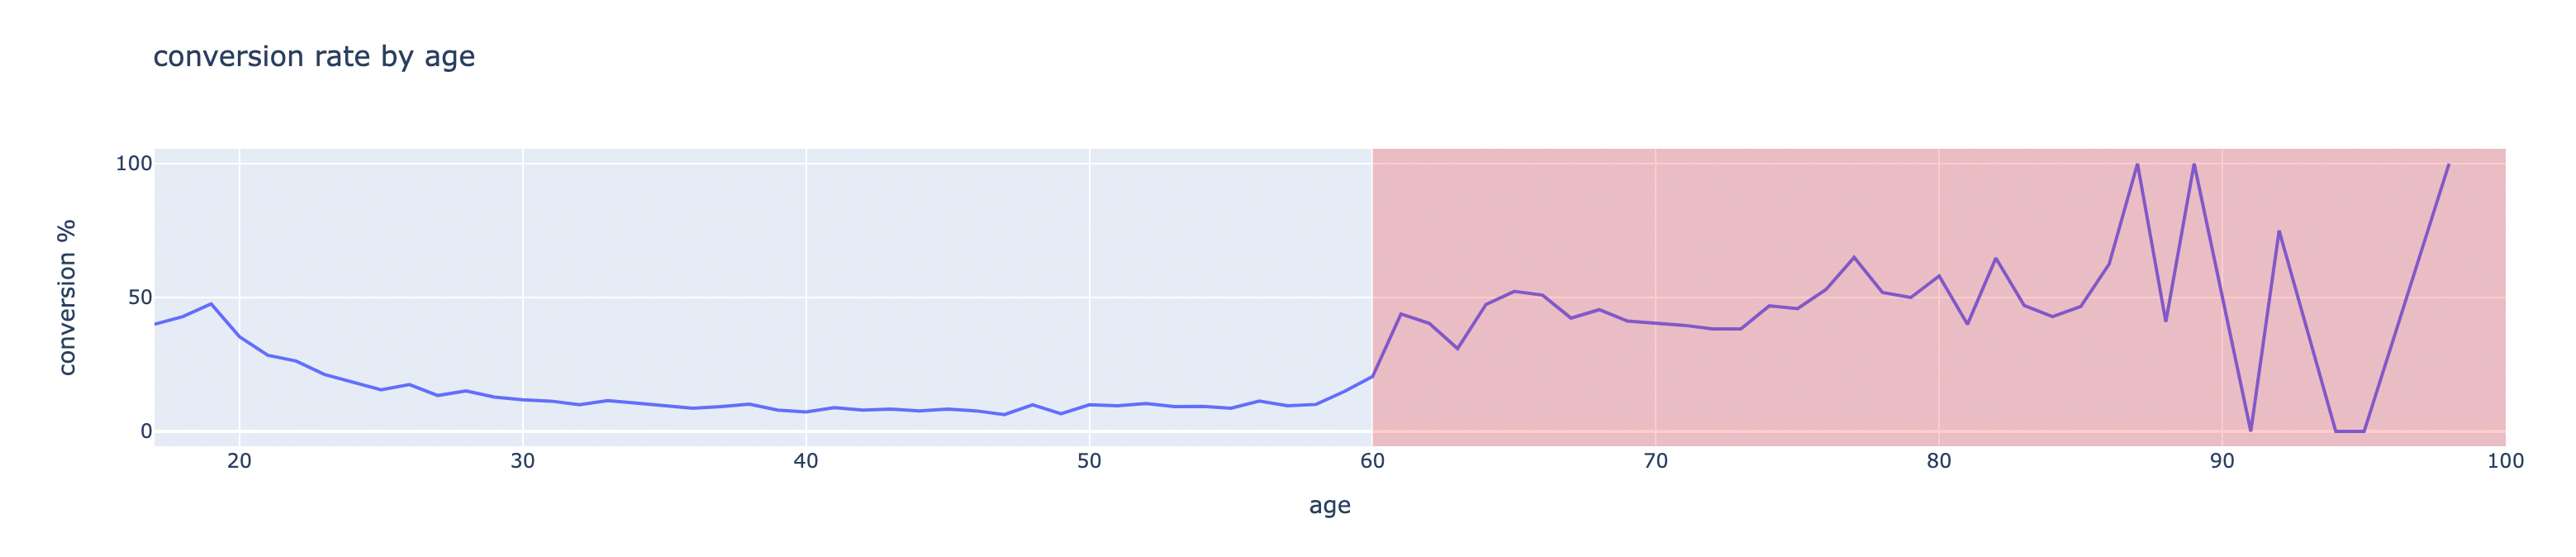

In [61]:
cr_age_fig = px.line(conversions_age, 
                     x=list(conversions_age.index), 
                     y='conversion',
                    labels={'x':'age', 'conversion': 'conversion %'},
                    title='conversion rate by age')
cr_age_fig.add_vrect(x0=60, x1=100, line_width=0, fillcolor="red", opacity=0.2)
cr_age_fig
Image(filename='./images/ch2_1.png', width=1500)

There's a clear demarcation between the younger an older demographic (age >= 60) when it comes to conversion rates.

&nbsp;

---
### Bin ages into groups:
Below we bin the ages into 6 distinct groups in order to reduce some of the erratic behavior we see in the previous chart when it comes to the olde folk.

In [7]:
data['age group'] = pd.cut(data['age'], 
                           bins=[18, 30, 40, 50, 60, 70, np.inf],
                           labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70+'],
                           right=False)

# group by age group and convert:
conversions_age_group = data.groupby('age group')['conversion'].sum() / data.groupby('age group')['conversion'].count()
conversions_age_group = np.round(conversions_age_group*100, 2)
conversions_age_group.to_frame()

,conversion
age group,
18-29,16.24
30-39,10.13
40-49,7.92
50-59,10.16
60-69,34.67
70+,47.12


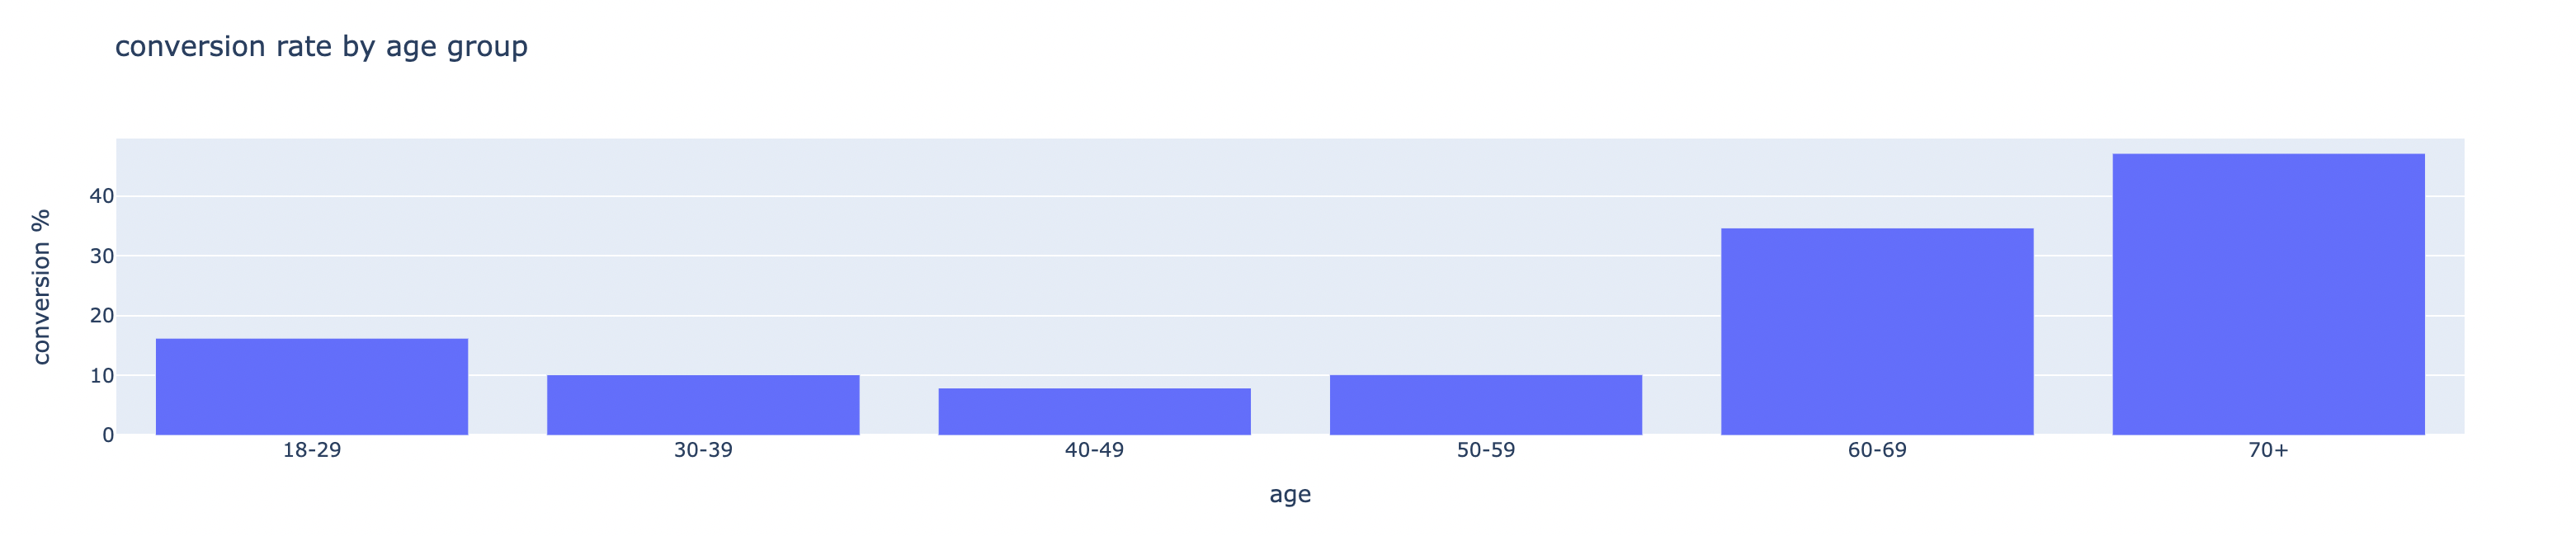

In [62]:
# plot:
cr_age_fig = px.bar(conversions_age_group, 
                     x=list(conversions_age_group.index), 
                     y='conversion',
                    labels={'x':'age', 'conversion': 'conversion %'},
                    title='conversion rate by age group')
cr_age_fig
Image(filename='./images/ch2_2.png', width=1500)

&nbsp;

---
### Calculate Conversion Rate by Marital Status:

In [9]:
marital_cr = data.groupby('marital')['conversion'].sum() / data.groupby('marital')['conversion'].count()
marital_cr = np.round(marital_cr*100, 2)
marital_cr.to_frame()

,conversion
marital,
divorced,10.32
married,10.16
single,14.00
unknown,15.00


### Get counts of conversions vs. non-conversions:

In [10]:
marital_counts = data.pivot_table(index='marital', columns='y', values='conversion', aggfunc='count').reset_index()
marital_counts.rename(columns={'no': 'non-conversions', 'yes': 'conversions'}, inplace=True)
marital_counts

y,marital,non-conversions,conversions
0,divorced,4136,476
1,married,22396,2532
2,single,9948,1620
3,unknown,68,12


### Plot conversions vs non-conversions:

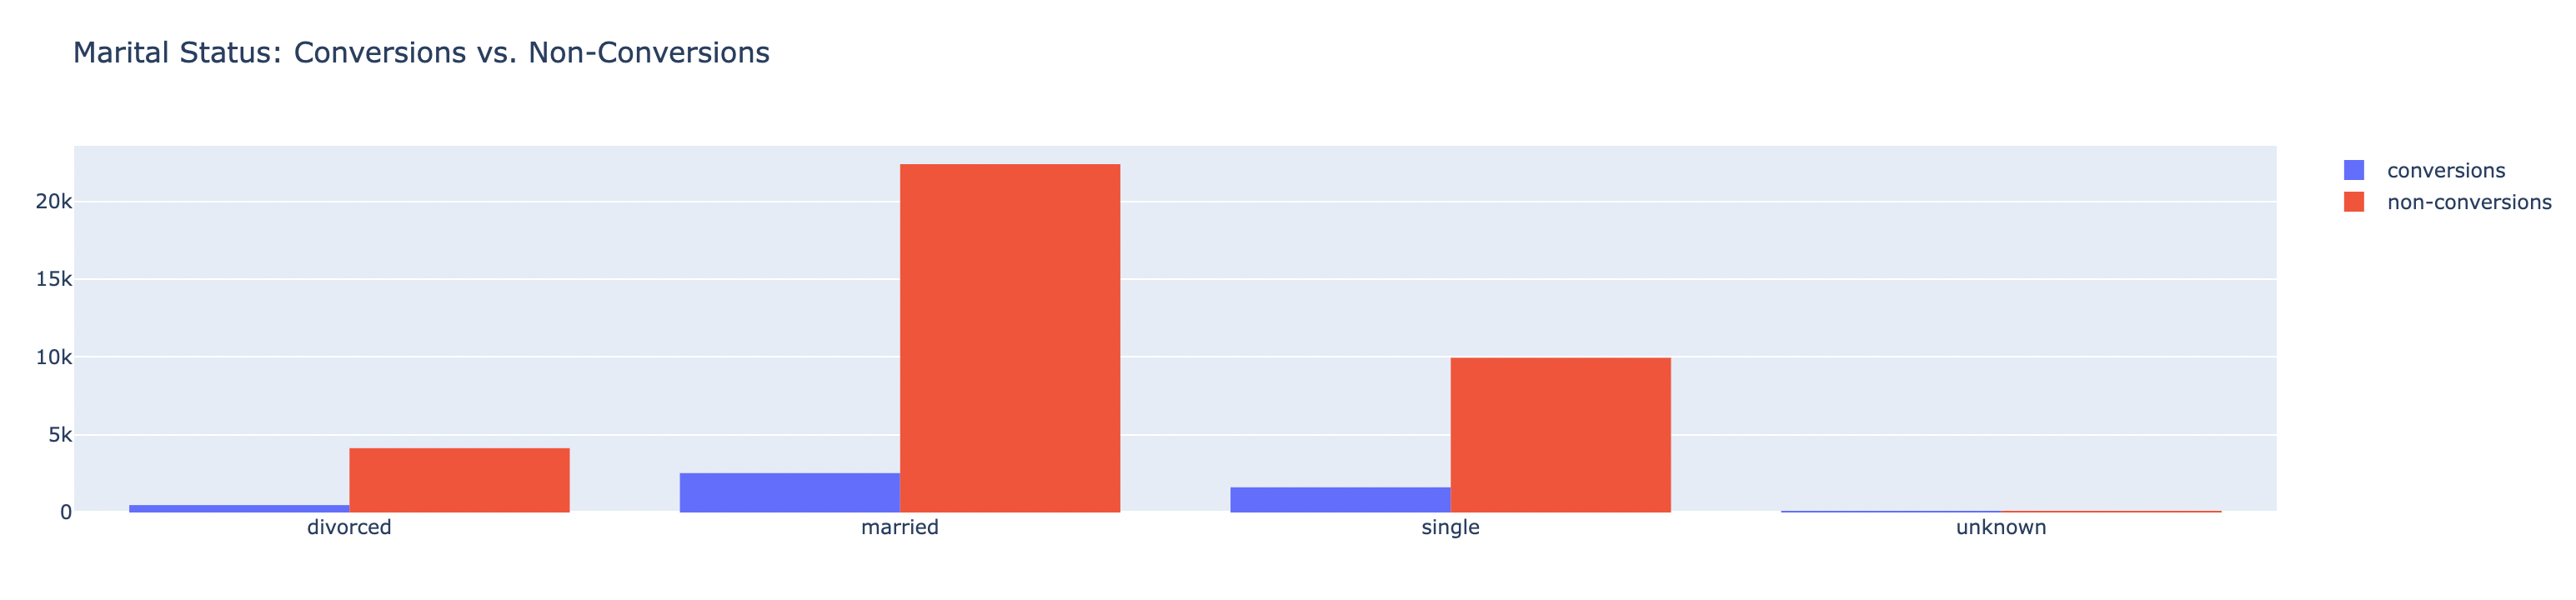

In [65]:
maritals_fig = go.Figure()
maritals_fig.add_trace(go.Histogram(histfunc="sum", y=marital_counts['conversions'], x=marital_counts['marital'], name='conversions'))
maritals_fig.add_trace(go.Histogram(histfunc="sum", y=marital_counts['non-conversions'], x=marital_counts['marital'], name='non-conversions'))
maritals_fig.update_layout(title_text="Marital Status: Conversions vs. Non-Conversions", height=400)
Image(filename='./images/ch2_3.png', width=1500)

&nbsp;

---
### Calculate Conversion Rate by Marital Status and Age Group:

In [48]:
# get age group conversion counts by marital status:
marital_age_counts = data.pivot_table(index='age group', columns='marital', values='conversion', aggfunc='sum')
marital_age_counts

marital,divorced,married,single,unknown
age group,,,,
18-29,12,158,749,1
30-39,128,897,684,6
40-49,126,575,130,3
50-59,119,533,44,1
60-69,27,218,5,1
70+,64,151,6,0


In [51]:
# get total number of people in each age group:
total_age_group = data.groupby('age group')['conversion'].count()
total_age_group

age group
18-29     5664
30-39    16938
40-49    10526
50-59     6862
60-69      724
70+        469
Name: conversion, dtype: int64

In [53]:
# divide the age group conversions by the total (row-wise):
marital_age_df = marital_age_counts.divide(total_age_group, axis=0)
marital_age_df

marital,divorced,married,single,unknown
age group,,,,
18-29,0.002119,0.027895,0.132239,0.000177
30-39,0.007557,0.052958,0.040383,0.000354
40-49,0.011970,0.054627,0.012350,0.000285
50-59,0.017342,0.077674,0.006412,0.000146
60-69,0.037293,0.301105,0.006906,0.001381
70+,0.136461,0.321962,0.012793,0.000000


### Plot:

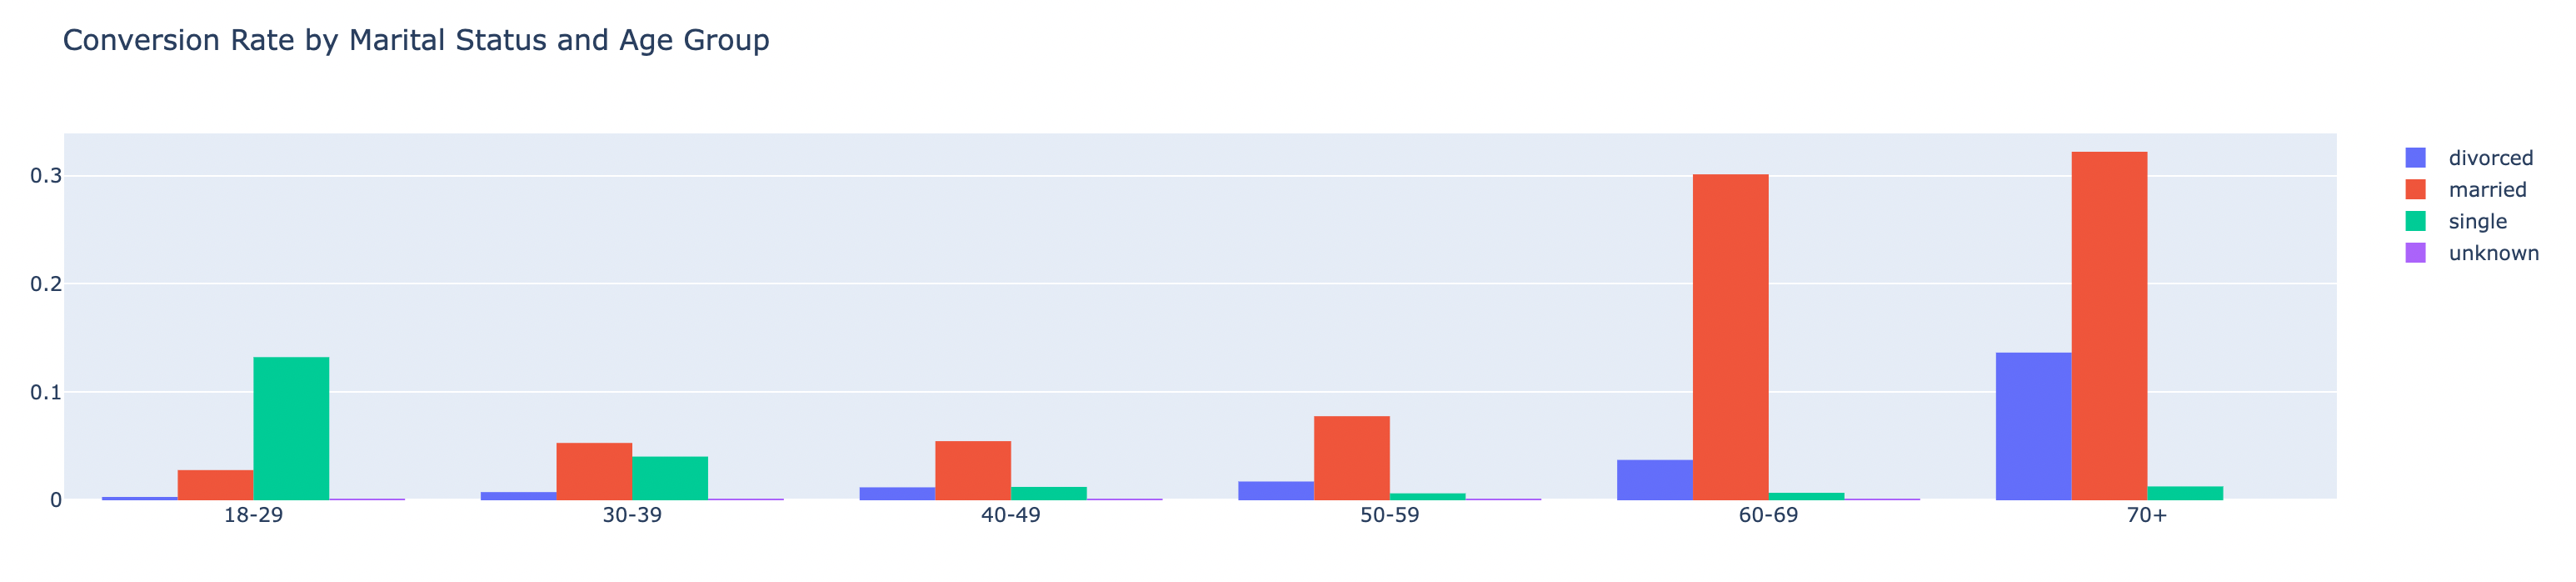

In [66]:
maritals_age_fig = go.Figure()
maritals_age_fig.add_trace(go.Histogram(histfunc="sum", y=marital_age_df['divorced'], x=marital_age_df.index, name='divorced'))
maritals_age_fig.add_trace(go.Histogram(histfunc="sum", y=marital_age_df['married'], x=marital_age_df.index, name='married'))
maritals_age_fig.add_trace(go.Histogram(histfunc="sum", y=marital_age_df['single'], x=marital_age_df.index, name='single'))
maritals_age_fig.add_trace(go.Histogram(histfunc="sum", y=marital_age_df['unknown'], x=marital_age_df.index, name='unknown'))
maritals_age_fig.update_layout(title_text='Conversion Rate by Marital Status and Age Group', height=400)
Image(filename='./images/ch2_4.png', width=1500)